In [249]:
#read file
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [257]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [210]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [211]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [212]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [213]:
df=pd.read_csv('reviews.csv')
df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...


In [214]:
#explore dataset
df.shape

(332540, 6)

In [215]:
df['listing_id'].value_counts()

545685                1002
585326                 914
35642179               900
8356380                788
8739                   770
                      ... 
39243166                 1
37884799                 1
677612953936484679       1
677904191016015762       1
807248329329810356       1
Name: listing_id, Length: 5611, dtype: int64

In [216]:
df['date'].value_counts().sort_values()

2009-07-23      1
2010-11-05      1
2010-11-15      1
2010-11-25      1
2011-04-12      1
             ... 
2019-11-22    444
2022-09-23    445
2022-09-26    446
2022-08-08    510
2021-11-01    583
Name: date, Length: 4596, dtype: int64

In [217]:
df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [236]:
df['comments']=df['comments'].astype(pd.StringDtype())
df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         string
dtype: object

In [241]:
wpt=nltk.WordPunctTokenizer()
stop_words=nltk.corpus.stopwords.words("english")

In [238]:
#preprocess text
def preprocess_text(text):
  text=re.sub(r'http\S+',' ',str(text))
  text=re.sub(r'<.*?>',' ',str(text))
  #remove numbers and special characters
  text=re.sub('[^A-Za-z]+',' ',str(text))
  text=text.lower()
  return text

In [240]:
df['comments']=df['comments'].apply(preprocess_text)
df.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,our experience was without a doubt a five star...
1,958,6660,2009-08-03,26145,Simon,returning to san francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,we were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,we highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,V Jillian,holly s place was great it was exactly what i ...
5,958,29240,2010-03-13,78623,Mathieu,on top of all that has been said previously i ...
6,958,32988,2010-04-03,96027,Lauren,this apartment was everything i could have hop...
7,958,220443,2011-04-08,426888,Michelle,great place to stay i would highly recommend i...
8,958,567690,2011-09-26,539189,Sarah,great location in san francisco really felt li...
9,958,1786860,2012-07-24,2059845,Jörg,we had a wonderful time at holly davids place ...


In [242]:
df['comments']=df['comments'].apply(lambda x:' '.join([word for word in x.split()if word not in (stop_words)]))
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,experience without doubt five star experience ...
1,958,6660,2009-08-03,26145,Simon,returning san francisco rejuvenating thrill ti...
2,958,11519,2009-09-27,25839,Denis,pleased accommodations friendly neighborhood a...
3,958,16282,2009-11-05,33750,Anna,highly recommend accomodation agree previous p...
4,958,26008,2010-02-13,15416,V Jillian,holly place great exactly needed perfect locat...


In [245]:
lemma=WordNetLemmatizer()
def text_preprocess(text):
  text=' '.join(lemma.lemmatize(word)for word in text.split(' '))
  return text

In [246]:
df['comments']=df['comments'].apply(text_preprocess)
df.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,experience without doubt five star experience ...
1,958,6660,2009-08-03,26145,Simon,returning san francisco rejuvenating thrill ti...
2,958,11519,2009-09-27,25839,Denis,pleased accommodation friendly neighborhood ab...
3,958,16282,2009-11-05,33750,Anna,highly recommend accomodation agree previous p...
4,958,26008,2010-02-13,15416,V Jillian,holly place great exactly needed perfect locat...
5,958,29240,2010-03-13,78623,Mathieu,top said previously would add quiet place holl...
6,958,32988,2010-04-03,96027,Lauren,apartment everything could hoped place extreme...
7,958,220443,2011-04-08,426888,Michelle,great place stay would highly recommend superb...
8,958,567690,2011-09-26,539189,Sarah,great location san francisco really felt like ...
9,958,1786860,2012-07-24,2059845,Jörg,wonderful time holly david place perfect famil...


In [248]:
comment_words=''
stopwords=set(STOPWORDS)

In [250]:
for val in df.comments:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i]
  comment_words+=" ".join(tokens)+" "

In [251]:
wordcloud=WordCloud(width=800,height=800,
                    background_color='pink',
                    min_font_size=10,max_words=100).generate(comment_words)

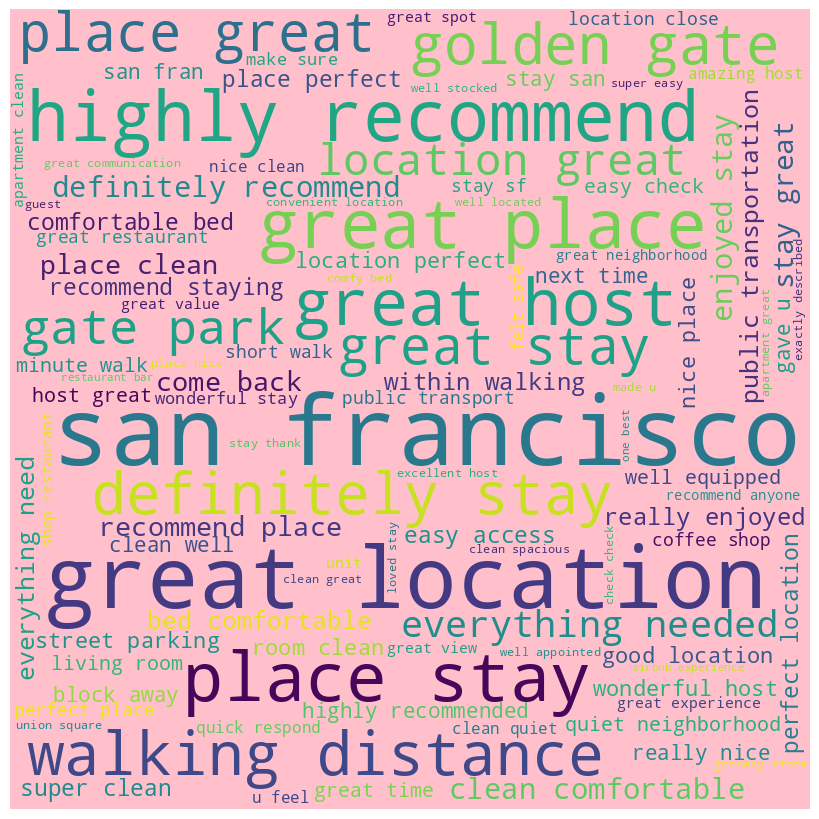

In [252]:
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [254]:
df1=df['comments']
df1.head()

0    experience without doubt five star experience ...
1    returning san francisco rejuvenating thrill ti...
2    pleased accommodation friendly neighborhood ab...
3    highly recommend accomodation agree previous p...
4    holly place great exactly needed perfect locat...
Name: comments, dtype: object

In [265]:
tv=TfidfVectorizer(min_df=0.2,max_df=0.8,norm='l2',
                   use_idf=True,smooth_idf=True)
tv_matrix=tv.fit_transform(df1)
tv_matrix=tv_matrix.toarray()
vocab=tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix,2),columns=vocab)

,clean,great,host,location,place,stay,would
0,0.00,0.00,0.74,0.67,0.00,0.00,0.00
1,0.00,0.34,0.45,0.00,0.36,0.74,0.00
2,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.55,0.00,0.50,0.67
4,0.43,0.34,0.00,0.41,0.73,0.00,0.00
...,...,...,...,...,...,...,...
332535,0.00,0.00,0.00,0.00,0.00,0.00,0.00
332536,0.00,0.00,0.00,0.00,0.44,0.90,0.00
332537,0.00,0.00,0.00,0.00,0.00,0.00,0.00
332538,0.00,0.00,0.00,0.00,0.00,0.00,0.00
